Create scatterplot of (x-axis - latitude, y-axis - peak time last winter)
--maybe make same plot for southern hemisphere
--maybe make same plot for troughs in summers

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import signal

In [2]:
data = pd.read_csv('data/locdata.csv')
coords = pd.read_csv('data/loccords.csv')

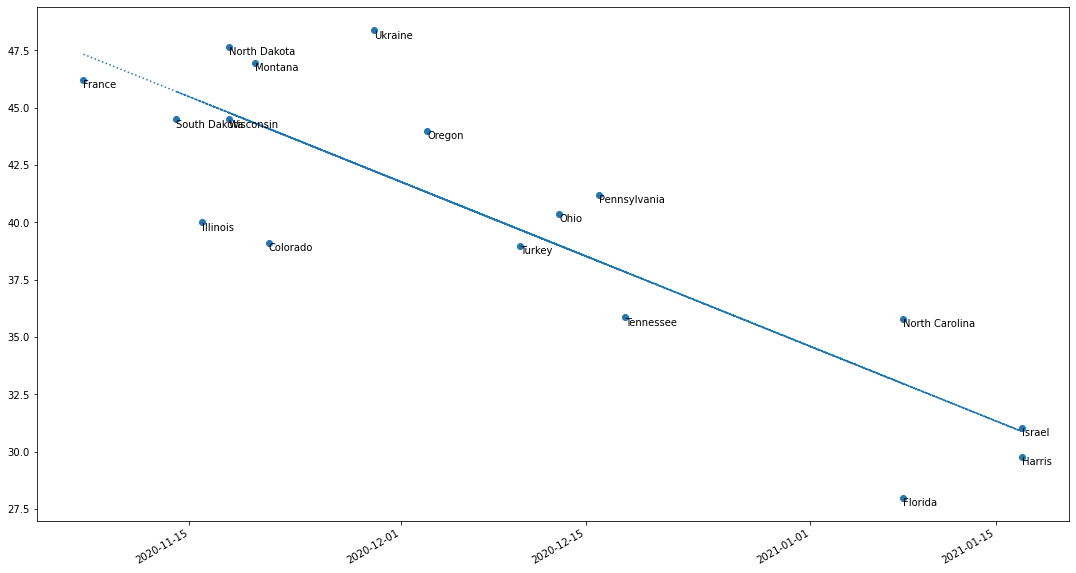

In [87]:
# latrange = [30,60]
# latdata = coords[['Place','Lat']][(coords['Lat'] > latrange[0]) & (coords['Lat'] < latrange[1])]
good_states = ['Harris, Texas', 'Wisconsin', 'North Dakota', 'South Dakota', 'Tennessee', 'Ohio']
ok_states = ['Florida', 'Illinois', 'Colorado', 'Oregon', 'North Carolina', 'Montana', 'Pennsylvania']
states = good_states + ok_states
states = [state + ', US' for state in states]

countries = ['Turkey', 'Israel', 'France', 'Ukraine']
countries = [country + ', ' + country for country in countries]

places = states + countries
latdata = coords[['Place','Lat']][coords['Place'].isin(places)]

dates = list(pd.to_datetime(data['Date']))

placeout = []
lats = []
peaks = []
window = [253,376] #10/1/20 - 2/1/21

for i, row in latdata.iterrows():
    place = row['Place']; lat = row['Lat'];
    locd = data[place].rolling(window=7).mean() 
    winter = locd[window[0]:window[1]] 
    
    avg = np.mean(winter)
    peak, _ = signal.find_peaks(winter, height=1.5*avg, distance=200) #only want one peak
    trough, _ = signal.find_peaks(-winter, distance=200)
#     half_width = signal.peak_widths(locd, peaks, rel_height=1)[0]  # peak width at half maximum
    if peak.size > 0:
        placeout.append(place)
        lats.append(lat)
        peaks.append(peak[0] + window[0])
        #if you want to plot each individual location
#         plt.plot(dates[window[0]:window[1]], winter)
#         plt.plot(dates[peaks[-1]], winter[peaks[-1]], 'r.')

#fit line to data
m, b = np.polyfit(peaks, lats, 1); line = [peak*m + b for peak in peaks]
#convert peak indeces to dates
peaks = [dates[i] for i in peaks]

#plot output
fig, ax = plt.subplots()
ax.scatter(peaks, lats)

#label scatterpoints
for i, txt in enumerate(placeout):
    ax.annotate(txt.split(',')[0], (peaks[i], lats[i]), horizontalalignment='left', verticalalignment='top')
ax.plot(peaks, line, ':')
#format x-axis to datetime
fig.autofmt_xdate()

# Text in the x axis will be displayed in 'YYYY-mm' format.
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

#set figure size
fig.set_size_inches(18.5, 10.5, forward=True)

#save plot
plt.savefig('Peakcompare.png' , dpi=100)
